In [274]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


train_loc ="train.csv";
train = pd.read_csv(train_loc);

test_loc ="test.csv";
test = pd.read_csv(test_loc);


In [275]:
print train.shape
print test.shape

#merging train and test
frames = [train,test]
merged = pd.concat(frames)


k = 0
for x in range(0,8):
    print merged.iloc[:,k:k+10].head(5)
    print merged.iloc[:,k:k+10].isnull().sum()
    print merged.iloc[:,k:k+10].describe()
    k = k +10


(1460, 81)
(1459, 80)
   1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2
0       856       854          0   NaN             3     1Fam       TA           No       706.0         0.0
1      1262         0          0   NaN             3     1Fam       TA           Gd       978.0         0.0
2       920       866          0   NaN             3     1Fam       TA           Mn       486.0         0.0
3       961       756          0   NaN             3     1Fam       Gd           No       216.0         0.0
4      1145      1053          0   NaN             4     1Fam       TA           Av       655.0         0.0
1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley           2721
BedroomAbvGr       0
BldgType           0
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
dtype: int64
          1stFlrSF     2ndFlrSF    3SsnPorch  BedroomAbvGr   BsmtFinSF1   BsmtFinSF2
count  2919.000000  29

In [277]:
for i in merged.columns:
    if(merged[i].dtype == object) & (merged[i].isnull().sum() >=1):
        merged[i] = merged[i].fillna("None")
        
merged.LotFrontage = merged.LotFrontage.fillna(merged.LotFrontage.mean())
merged.MasVnrArea = merged.MasVnrArea.fillna(0.0)
merged.BsmtFinSF1 = merged.BsmtFinSF1.fillna(test.BsmtFinSF1.mean())
merged.BsmtFinSF2 = merged.BsmtFinSF2.fillna("0.0")
merged.BsmtFullBath = merged.BsmtFullBath.fillna(merged.BsmtFullBath.mean())
merged.BsmtHalfBath = merged.BsmtHalfBath.fillna(merged.BsmtHalfBath.mean())
merged.GarageCars = merged.GarageCars.fillna(merged.GarageCars.mean())
merged.GarageArea = merged.GarageArea.fillna(merged.GarageArea.mean())
merged.TotalBsmtSF = merged.TotalBsmtSF.fillna(merged.TotalBsmtSF.mean())
merged.GarageYrBlt = merged.GarageYrBlt.fillna(0.0)
merged.BsmtUnfSF = merged.BsmtUnfSF.fillna(0.0)

In [279]:


print train.columns.to_series().groupby(merged.dtypes).groups

cols = [u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual', u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish', u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence', u'MiscFeature', u'SaleType', u'SaleCondition']

In [280]:
merged.YearBuilt = merged.YearBuilt - 1872
merged.YearRemodAdd = merged.YearRemodAdd - 1950
merged.YrSold = merged.YrSold - 2006
merged.GarageYrBlt = merged.GarageYrBlt - 1895.0



In [281]:

merged_dum = pd.get_dummies(merged[cols])



In [282]:
merged_num = merged.drop(cols,axis=1,inplace=True)


In [283]:
frames = [merged, merged_dum]

merged_f = pd.concat(frames,axis=1)

In [307]:

correlations = train.corr(method='pearson', min_periods=1)

correlations[correlations['SalePrice'] >= 0.5 ]


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_None,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_None,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,

In [299]:
train = merged_f.iloc[:1459,:]
test = merged_f.iloc[1460:,:]

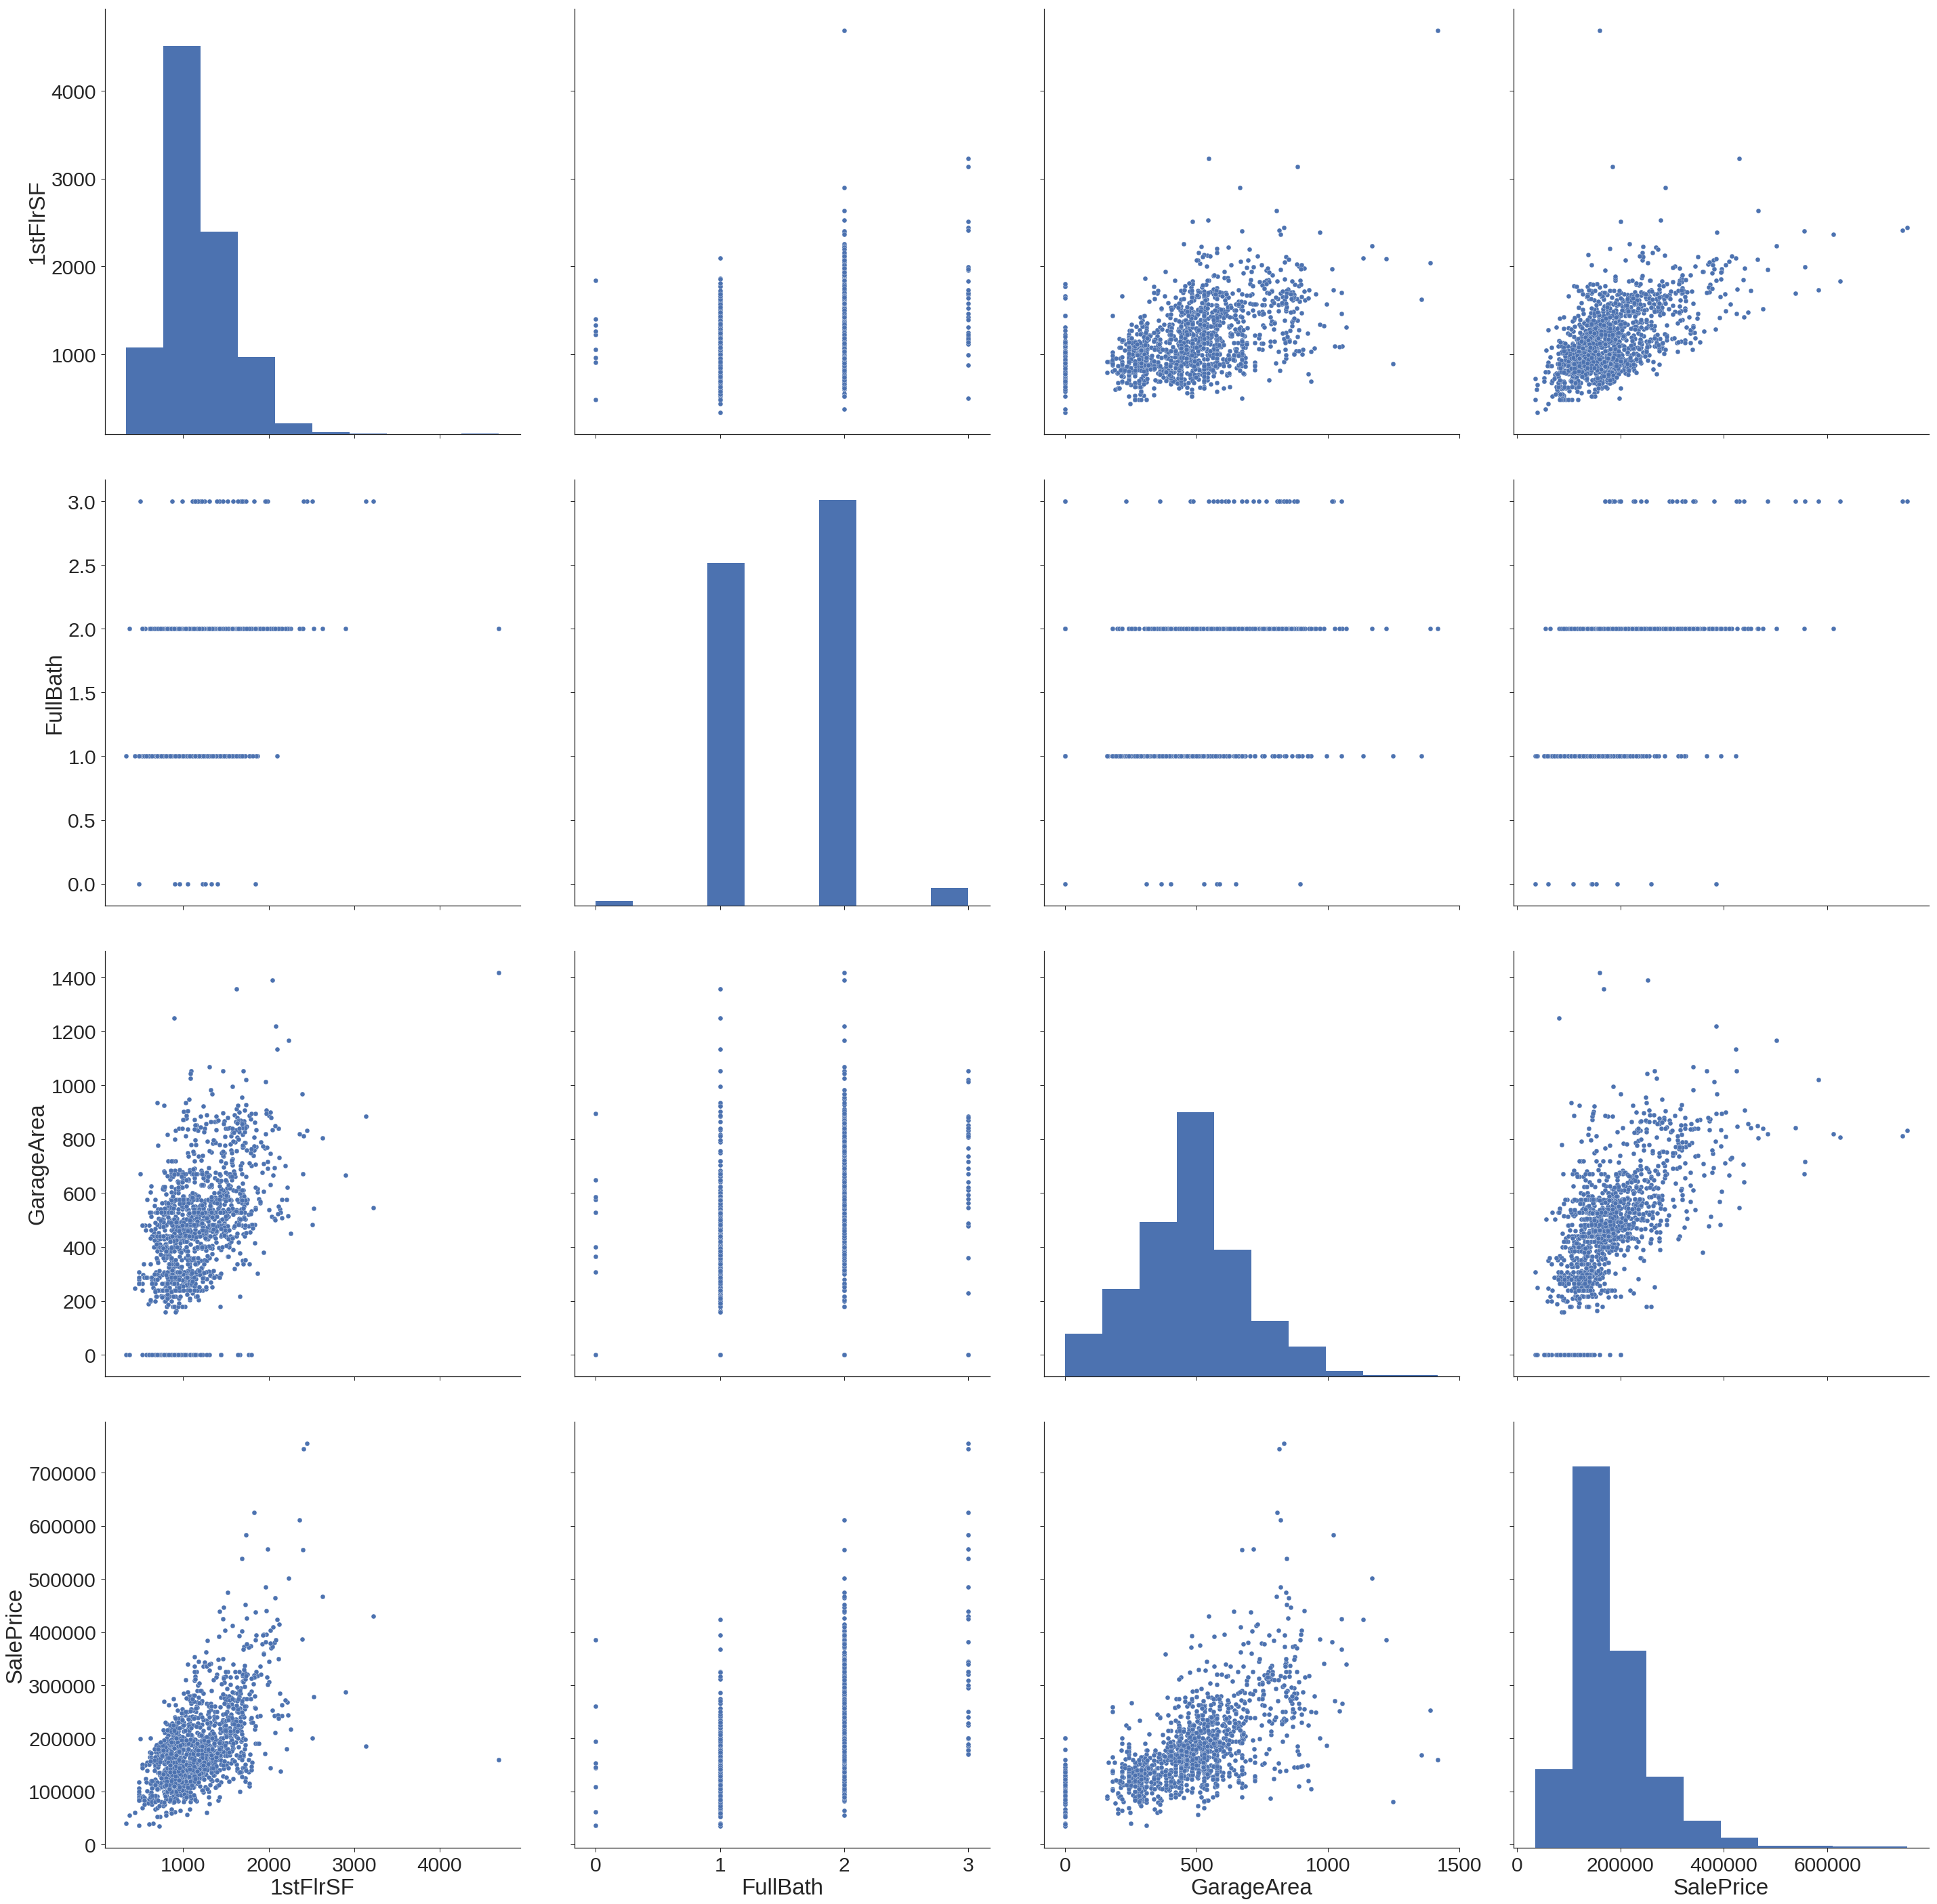

In [318]:
import seaborn as sns; sns.set(style="ticks",font_scale=3, color_codes=True)
g = sns.pairplot(train[['1stFlrSF','FullBath','GarageArea','SalePrice']],size=10)
plt.show()

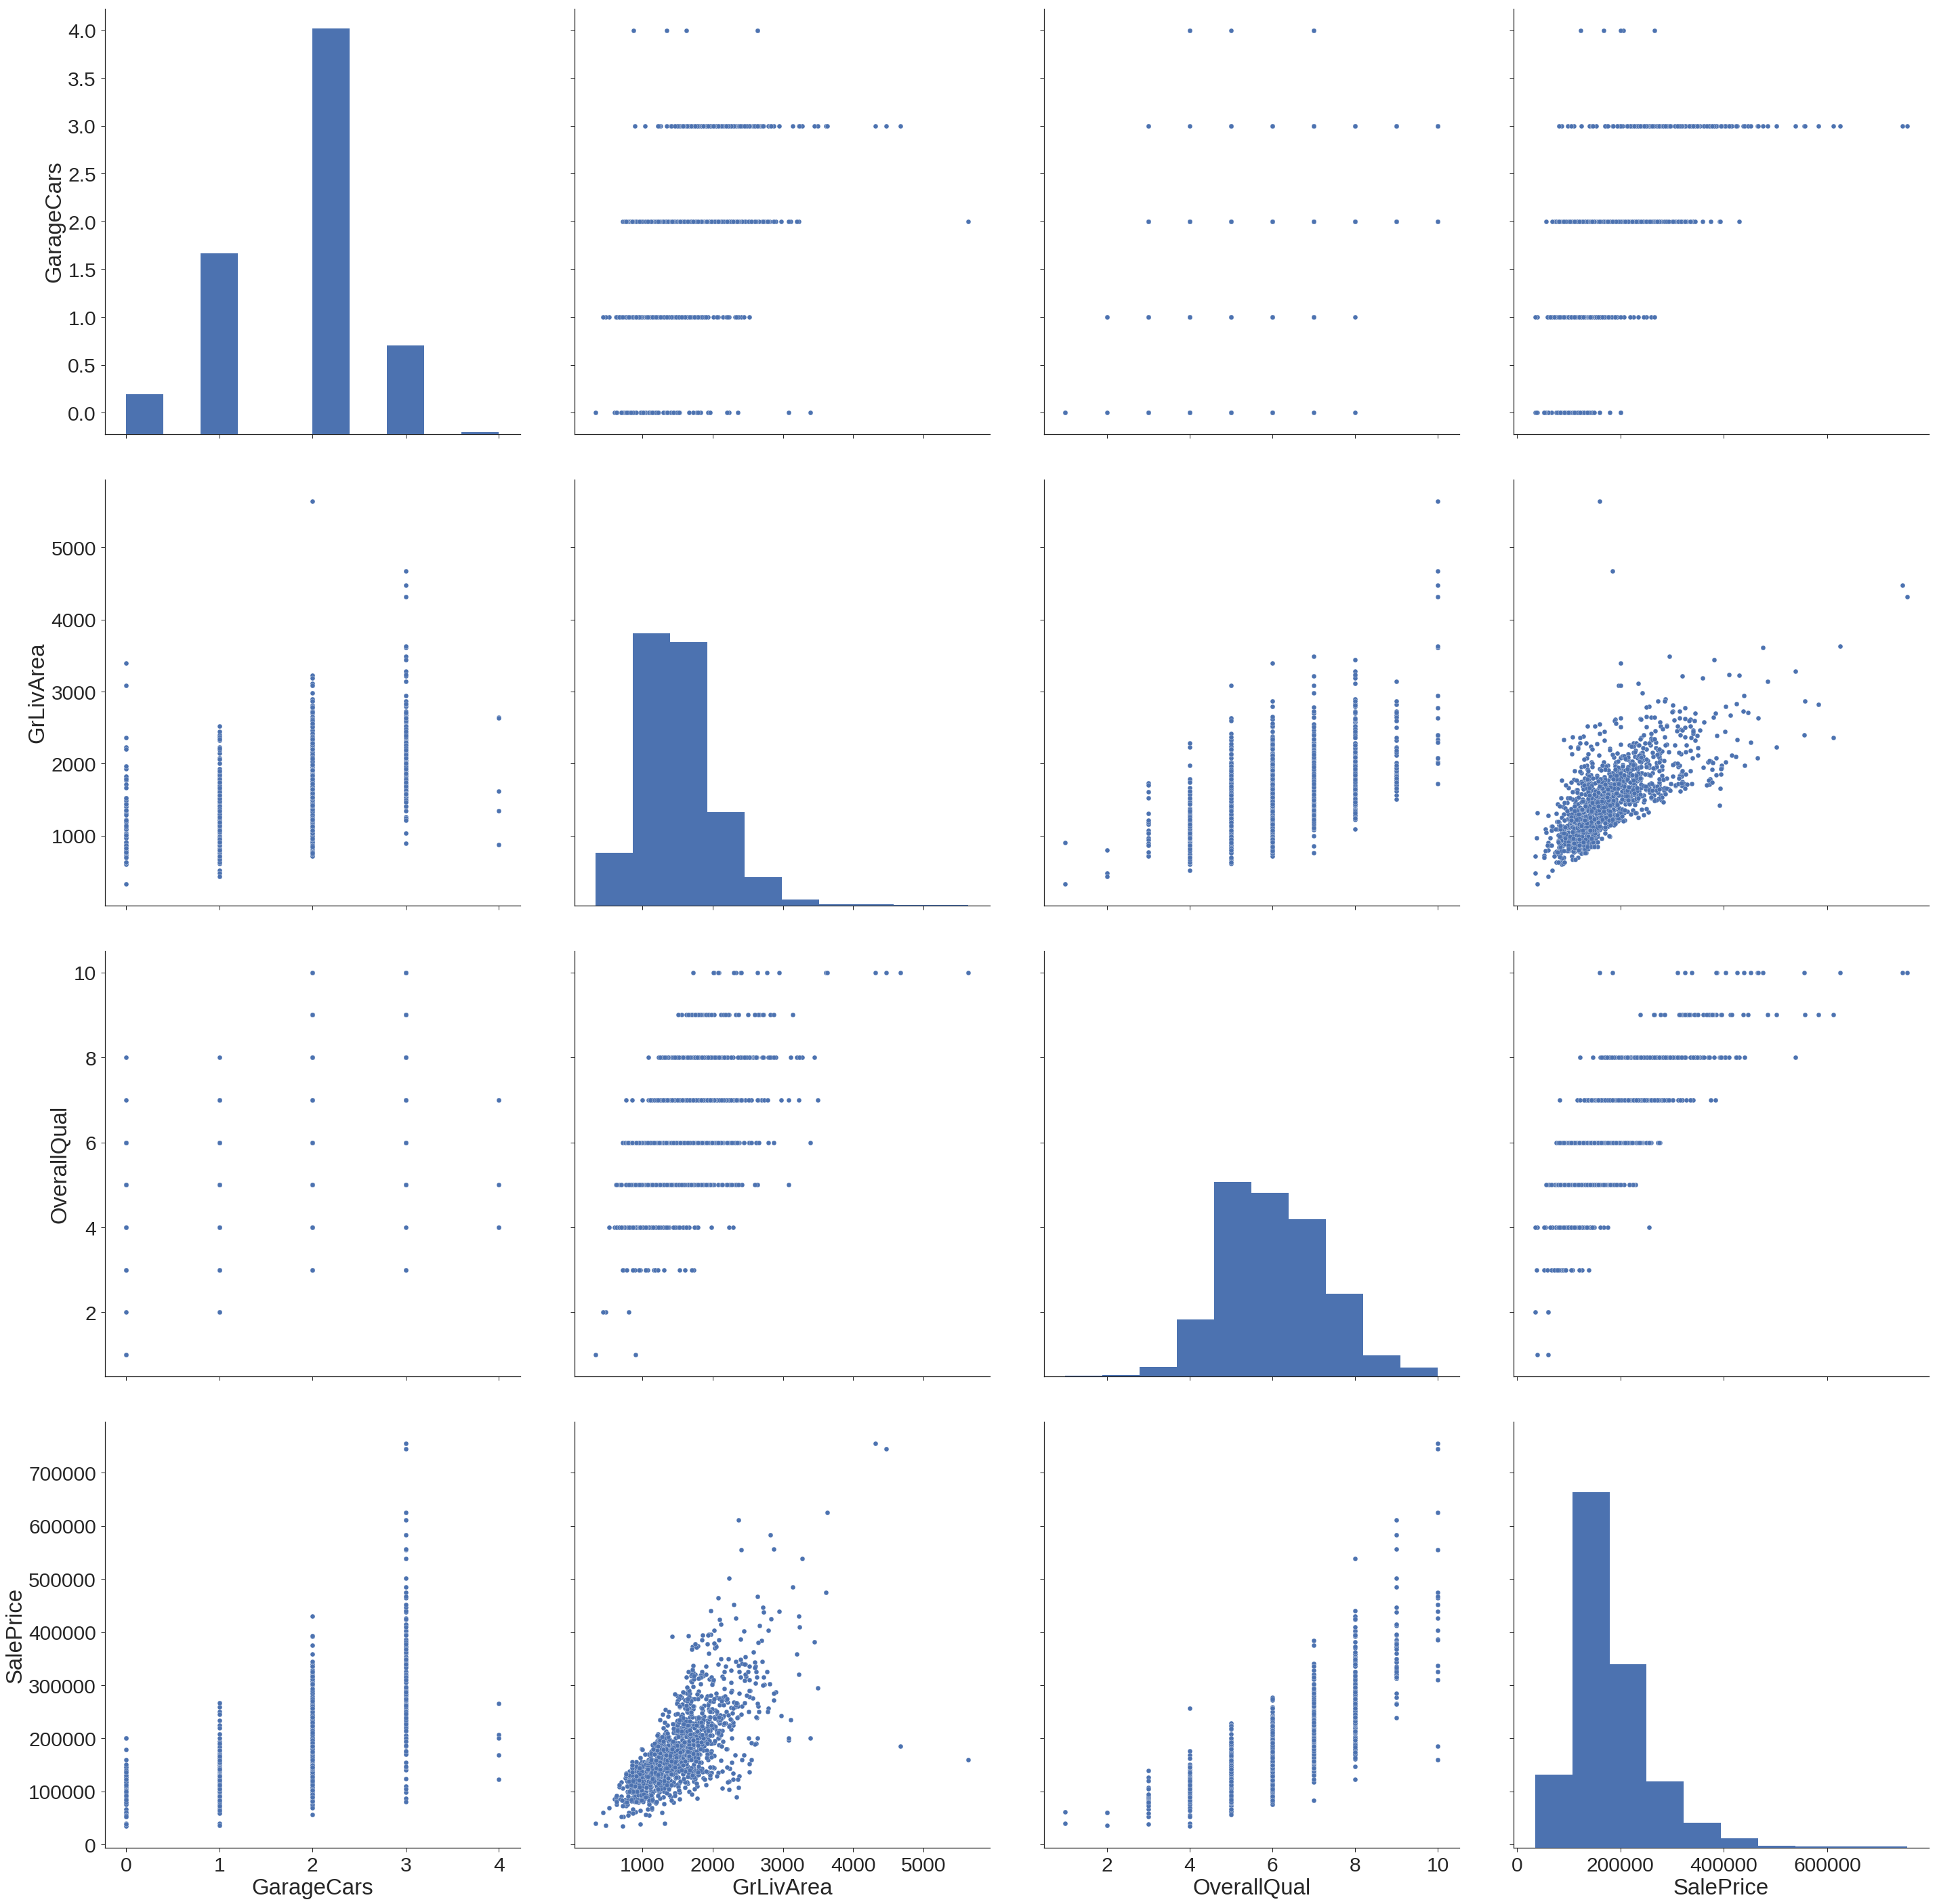

In [319]:
sns.set(style="ticks",font_scale=3, color_codes=True)
h = sns.pairplot(train[['GarageCars','GrLivArea','OverallQual','SalePrice']],size=10)
plt.show()

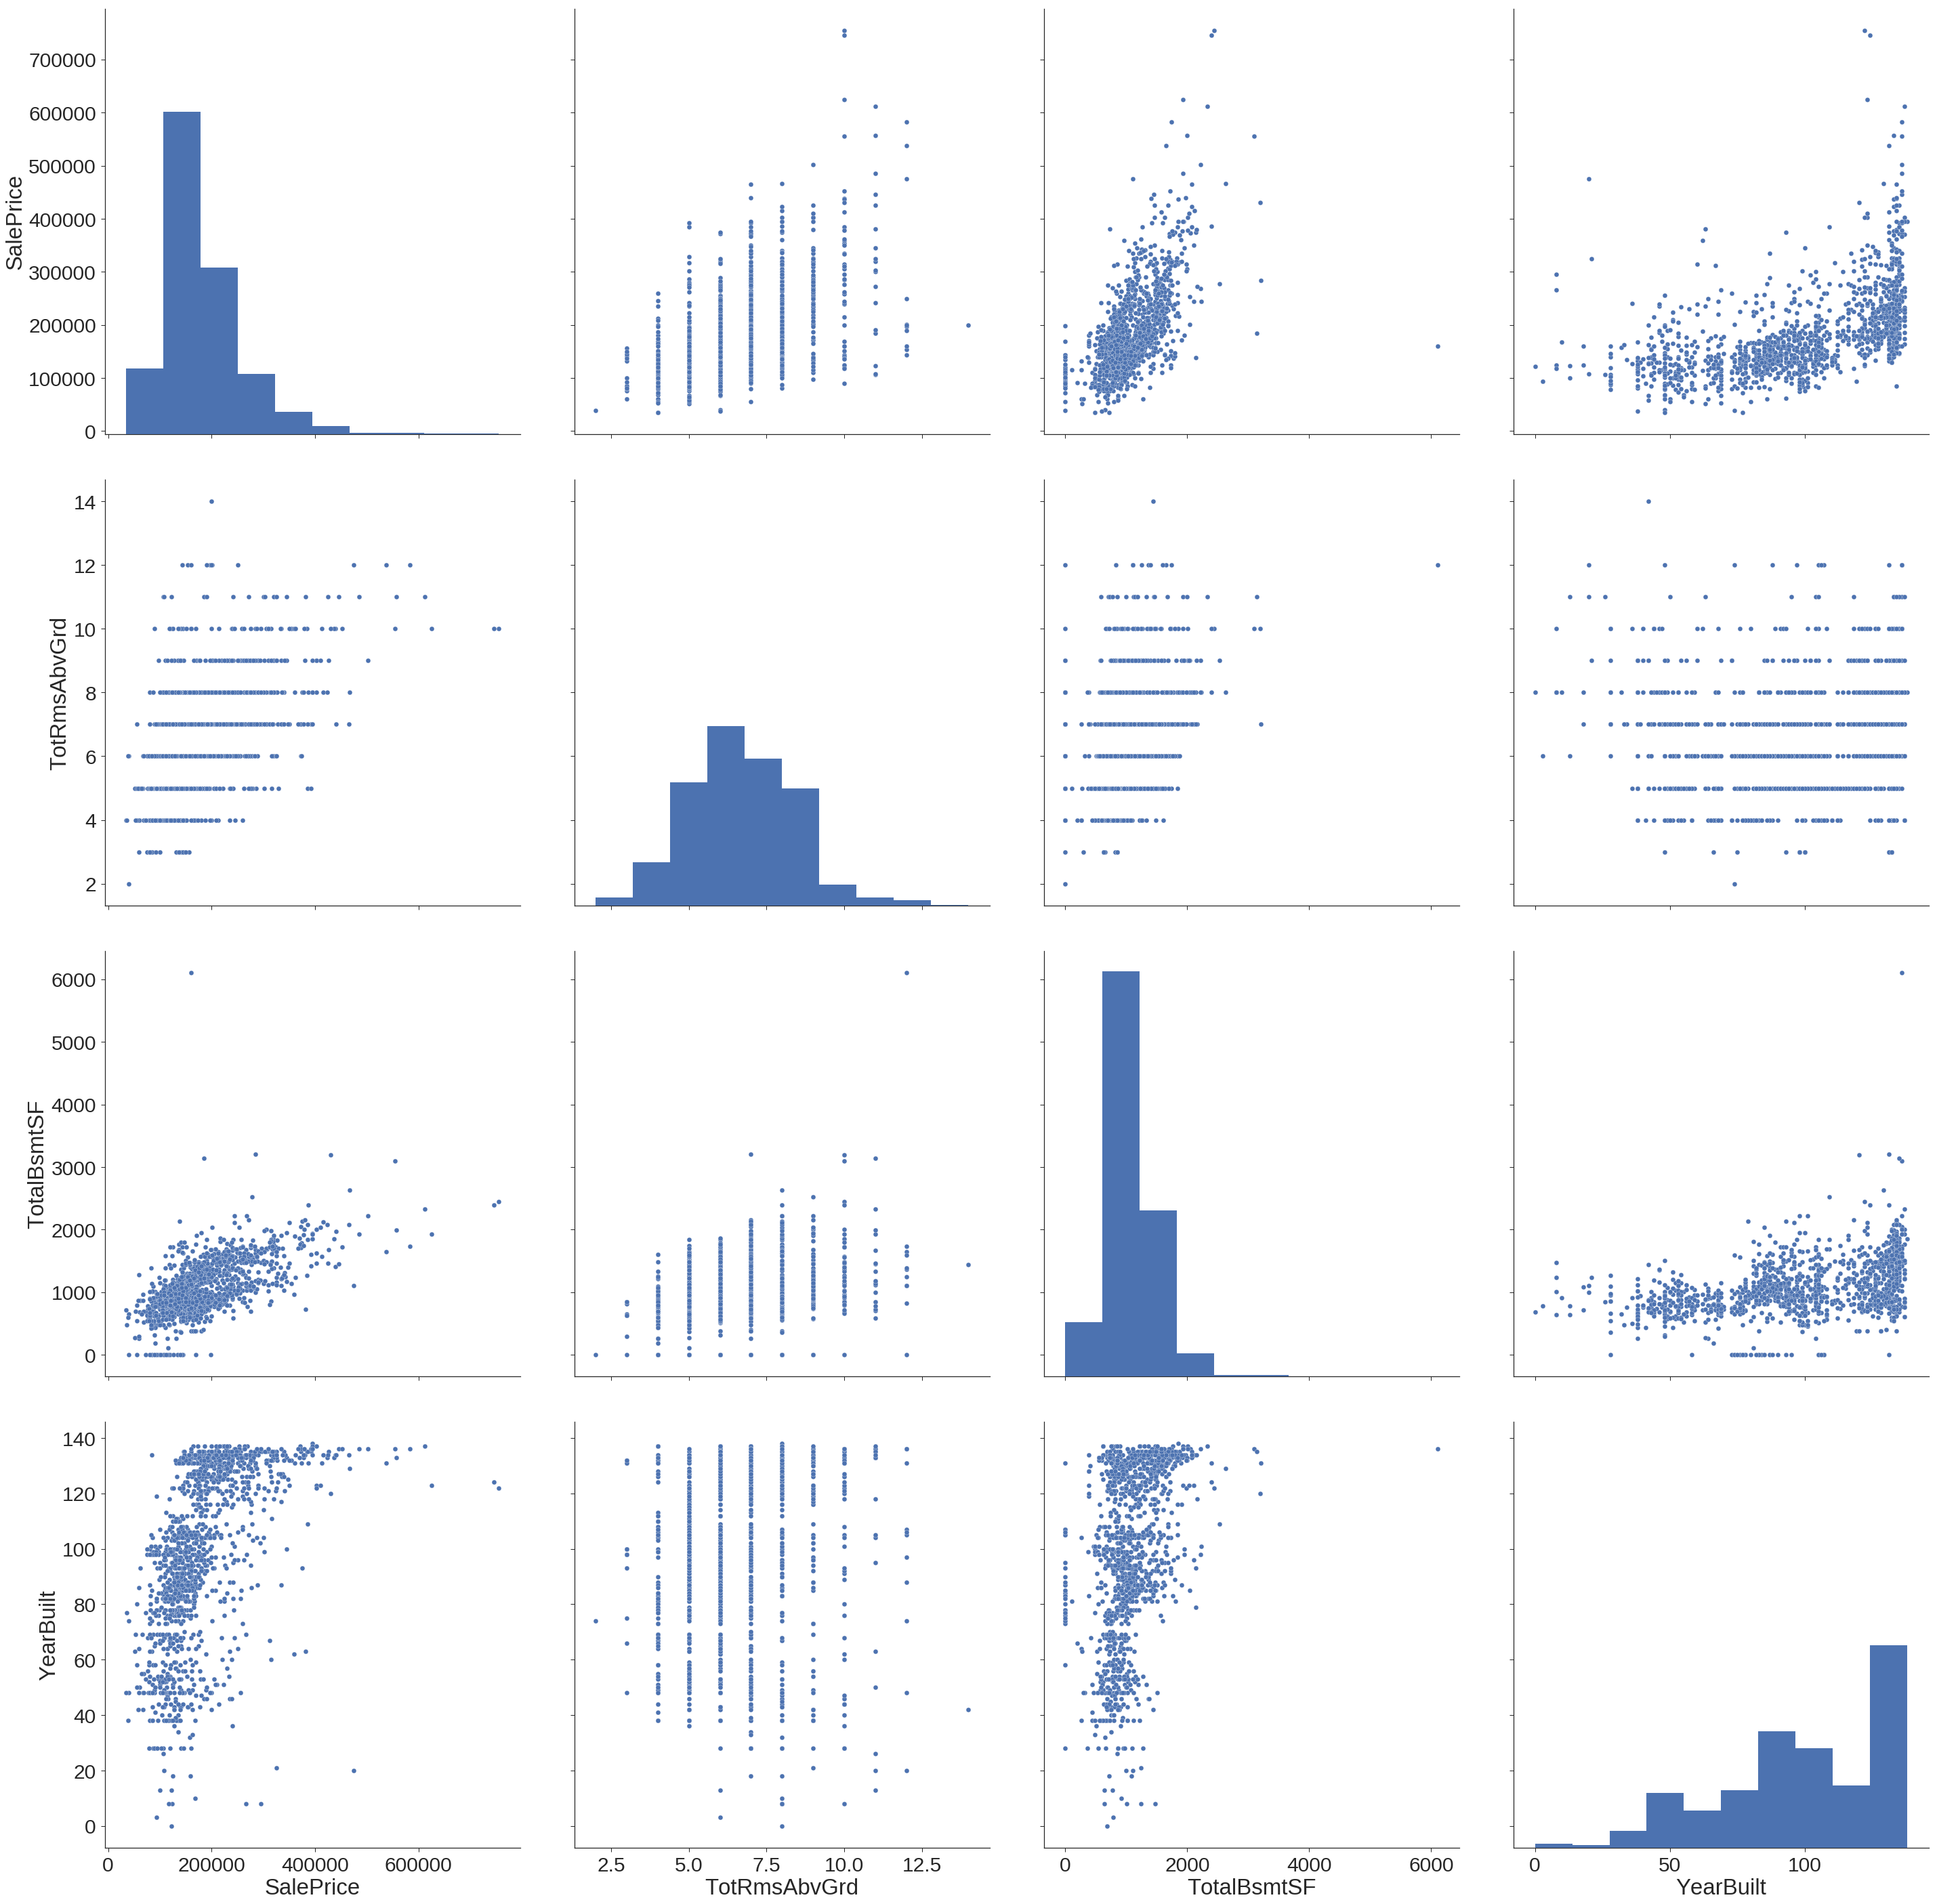

In [320]:
sns.set(style="ticks",font_scale=3, color_codes=True)
i = sns.pairplot(train[['SalePrice','TotRmsAbvGrd','TotalBsmtSF','YearBuilt']],size=10)
plt.show()

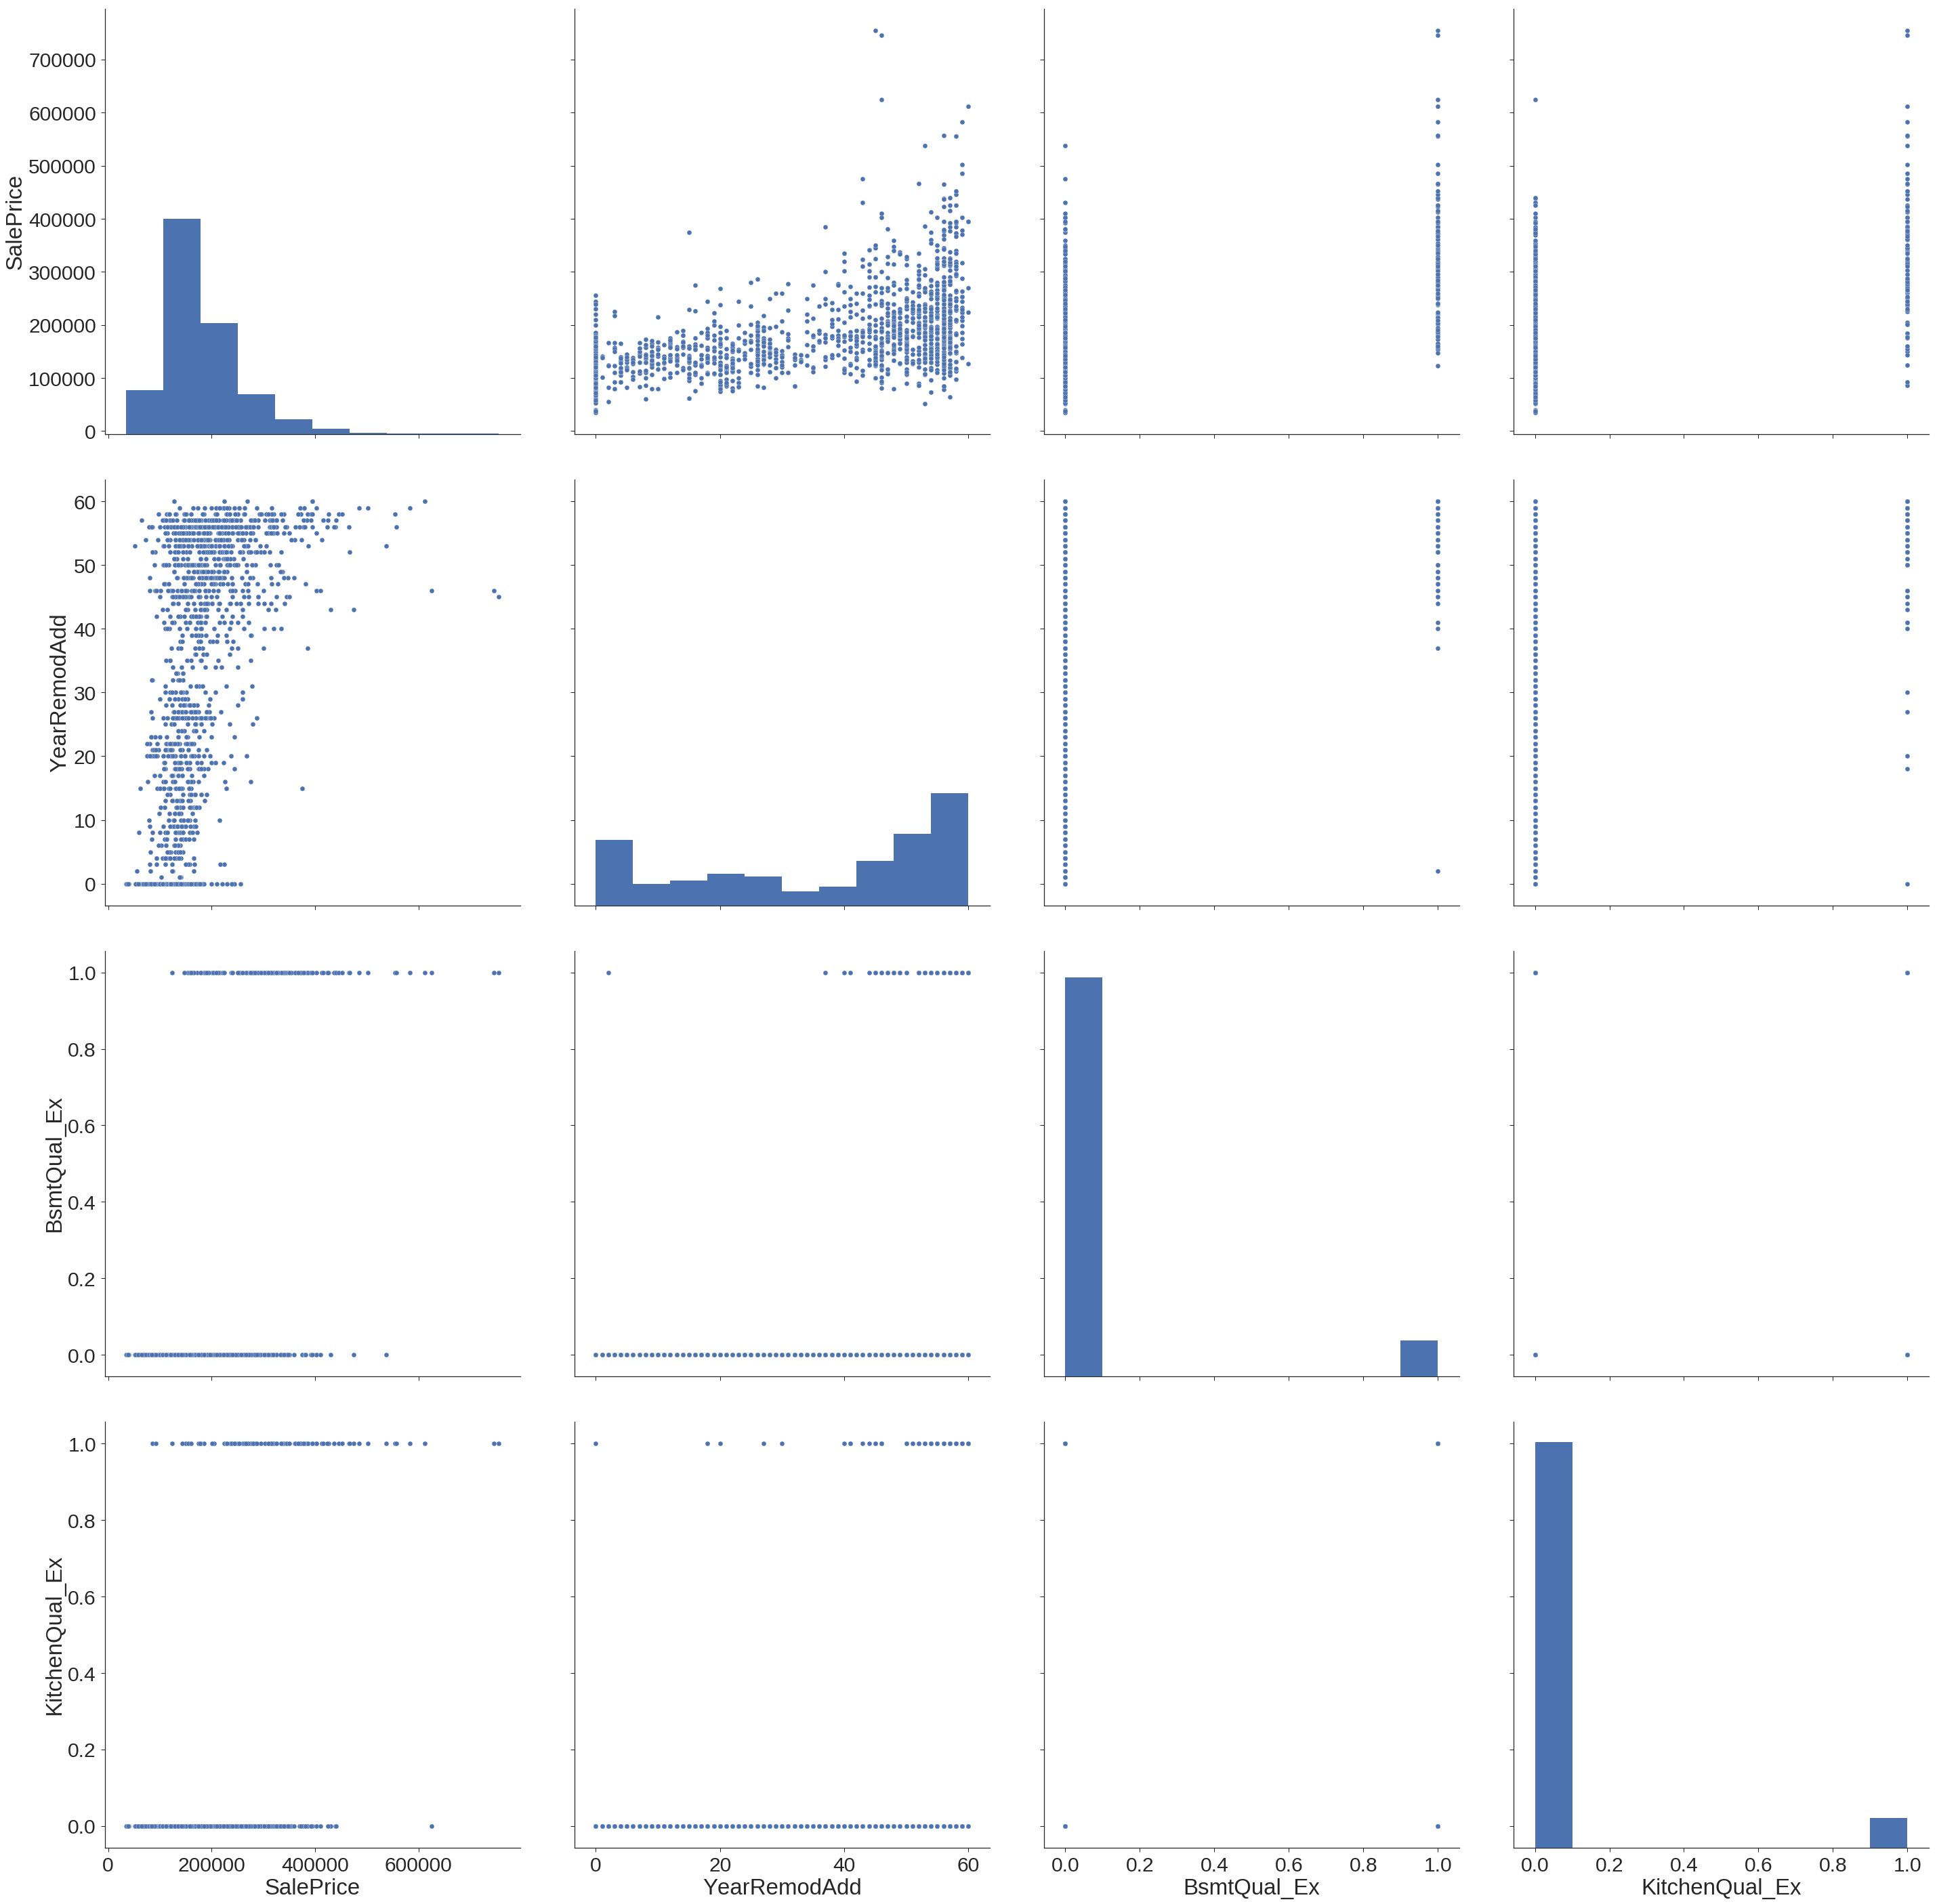

In [321]:
sns.set(style="ticks",font_scale=3, color_codes=True)
j = sns.pairplot(train[['SalePrice','YearRemodAdd','BsmtQual_Ex','KitchenQual_Ex']],size=10)
plt.show()

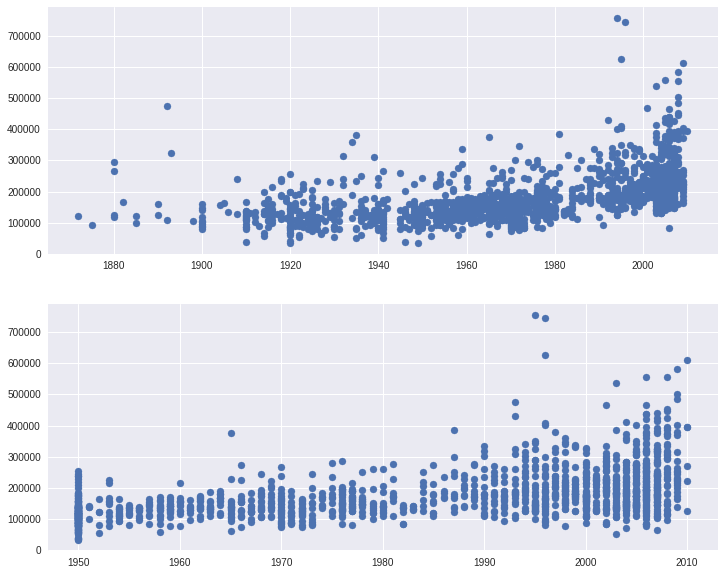

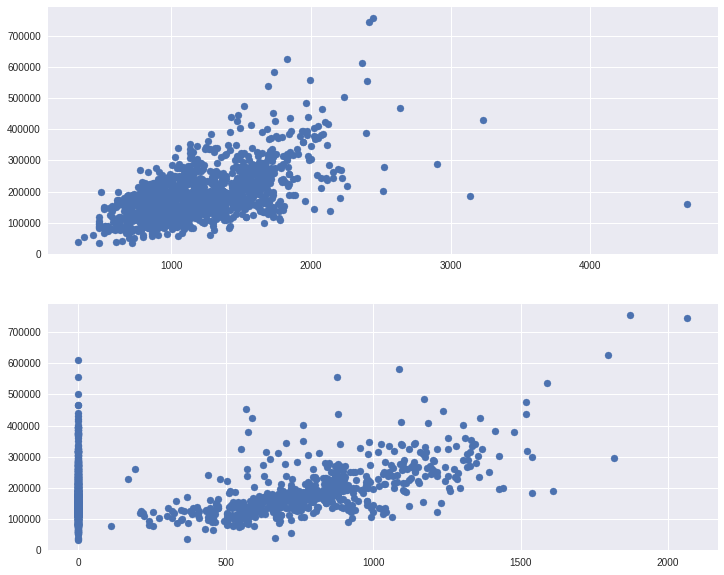

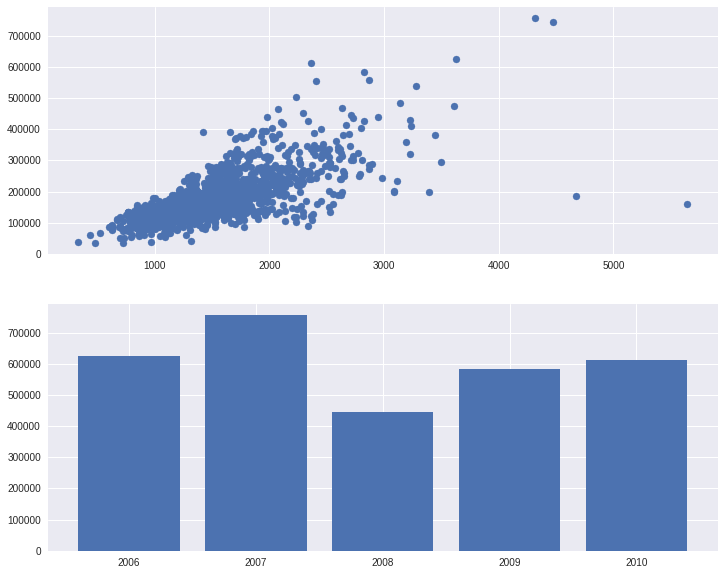

In [333]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
plt.scatter(train['YearBuilt'],train['SalePrice'])
plt.ylabel('Year Built')
plt.ylabel('Sale Price')
plt.subplot(2, 1, 2)
plt.scatter(train['YearRemodAdd'],train['SalePrice'])
plt.ylabel('Year Remodeled')
plt.ylabel('Sale Price')
plt.show()


plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
plt.scatter(train['1stFlrSF'],train['SalePrice'])
plt.ylabel('1st floor area sq feet')
plt.ylabel('Sale Price')
plt.subplot(2, 1, 2)
plt.scatter(train['2ndFlrSF'],train['SalePrice'])
plt.ylabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.subplot(2, 1, 2)
plt.bar(train['YrSold'],train['SalePrice'])
plt.show()



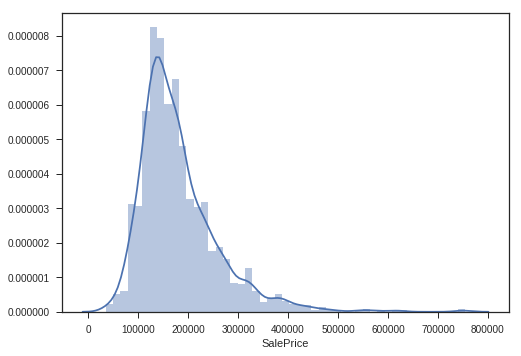

In [324]:
sns.set(style="ticks",font_scale=1, color_codes=True)
sns.distplot(train['SalePrice'])
plt.show()

In [292]:
y_train = train['SalePrice']
x_train = pd.DataFrame(train)
del x_train['SalePrice']
del test['SalePrice']
x_test = test

In [187]:
from sklearn import linear_model
from sklearn.metrics import r2_score
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)  
print("Mean squared error : %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error : 421089607.44
R2 Score: 0.93


In [54]:
reg = linear_model.Ridge(alpha=0.001,max_iter=1000)
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 1156692693.02
R2 Score: 0.82


In [277]:
reg = linear_model.RidgeCV(alphas=[0.01,0.1,0.25])
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 440200672.83
R2 Score: 0.93


In [276]:
reg = linear_model.Lasso(alpha=0.01,max_iter=100)
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 422502241.61
R2 Score: 0.93


In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
reg = RandomForestRegressor()
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 157387473.10
R2 Score: 0.98


In [56]:
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor()
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 864122214.93
R2 Score: 0.86


In [57]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))

print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 250157499.66
R2 Score: 0.96


In [58]:
from sklearn.linear_model import ARDRegression
reg = ARDRegression()
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 1170135483.31
R2 Score: 0.81


In [59]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor()
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 2127890384235838944041220522154917888.00
R2 Score: -337206654992480425505456128.00


In [193]:
x_train.BsmtFinSF2 = x_train.BsmtFinSF2.convert_objects(convert_numeric=True)

x_test.BsmtFinSF2 = x_test.BsmtFinSF2.convert_objects(convert_numeric=True)

/home/smauggy/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/home/smauggy/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [267]:
from xgboost import XGBRegressor
import scipy.stats as st
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)
params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.9),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': st.uniform(0.02,0.9),
    "min_child_weight": from_zero_positive
    
}
xgbreg = XGBRegressor(nthread=-1,objective='reg:linear')  
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(xgbreg, params, n_jobs=1,n_iter=50)  
gs.fit(x_train, y_train)  
gs.best_params_  


{'colsample_bytree': 0.91120929148189289,
 'gamma': 2.1038147062297439,
 'learning_rate': 0.2573732597449096,
 'max_depth': 21,
 'min_child_weight': 23.140734126280726,
 'n_estimators': 22,
 'reg_alpha': 0.45239130872901434,
 'subsample': 0.83772308267522533}

In [268]:
import math

print("Mean squared error: %.2f"
      % math.sqrt(np.mean((gs.predict(x_train) - y_train) ** 2)))
print("R2 Score: %.2f"
      %r2_score(y_train,gs.predict(x_train)))

Mean squared error: 19163.48
R2 Score: 0.94


In [262]:
predictions = reg.predict(x_test)
np.savetxt("results.csv",predictions,delimiter=",")